In [ ]:
! /anaconda/envs/py35/bin/python -m pip freeze
! /anaconda/envs/py35/bin/python -m pip --version

In [ ]:
import sys
sys.version

In [1]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Content-Type': 'application/json',
    'Prediction-key': '009281becef44f2c85dd96cd749d56ea',
}

params = urllib.parse.urlencode({
    # Request parameters
    'iterationId': '22f47df0-85a5-42e2-9e0c-d73a1591ad1d',
    'application': 'team 12 hardshell',
})

try:
    conn = http.client.HTTPSConnection('southcentralus.api.cognitive.microsoft.com')
    conn.request("POST", "/customvision/v2.0/Prediction/dbb69137-acbf-4209-88dd-3220c4011eb3/url?%s" % params, '{"Url": "http://img.cdn.mountainwarehouse.com/product/025374/025374_pur_featherweight_down_womens_jacket__wms_aw17_2.jpg"}', headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b'{"id":"e80c069c-e1f3-43ee-8ff9-2b09091ccbce","project":"e6da02d6-eac5-475e-b891-1e2400519a69","iteration":"22f47df0-85a5-42e2-9e0c-d73a1591ad1d","created":"2018-05-23T15:22:26.8589603Z","predictions":[{"probability":0.99997884,"tagId":"0b1f5b9b-038e-4eec-b20d-133850f2edd1","tagName":"insulated jacket"},{"probability":1.55497819E-05,"tagId":"bb3320bc-d247-4c0a-8cd9-3355a7b30c6a","tagName":"hardshell jacket"}]}'


/home/team12/team12/data/gear_images/boots/51fxSrdRH3L._AC_US436_QL65_.jpg
Step 1 processed and saved to: /home/team12/team12/data/gear_images/boots/newstep1/51fxSrdRH3L._AC_US436_QL65_.jpg


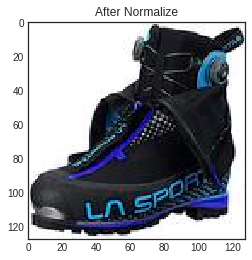

Step 2a normalized and saved to: /home/team12/team12/data/gear_images/boots/newstep2a/51fxSrdRH3L._AC_US436_QL65_.jpg


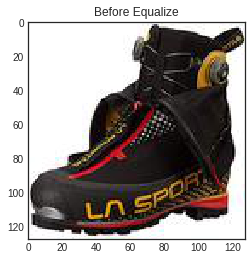

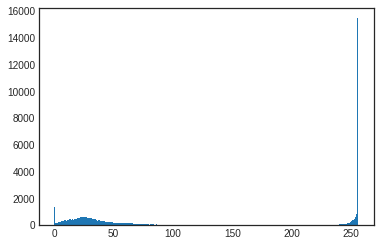

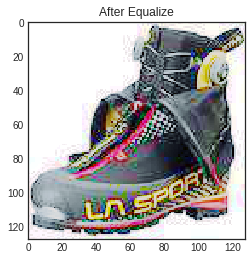

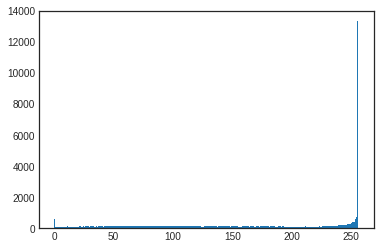

Step 2b equalized and saved to: /home/team12/team12/data/gear_images/boots/newstep2b/51fxSrdRH3L._AC_US436_QL65_.jpg
/home/team12/team12/data/gear_images/boots/10211759x1104651_zm.jpeg
Step 1 processed and saved to: /home/team12/team12/data/gear_images/boots/newstep1/10211759x1104651_zm.jpeg


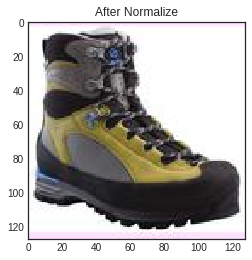

Step 2a normalized and saved to: /home/team12/team12/data/gear_images/boots/newstep2a/10211759x1104651_zm.jpeg


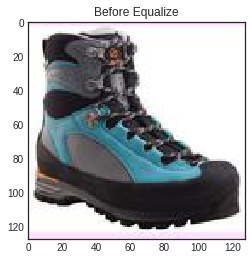

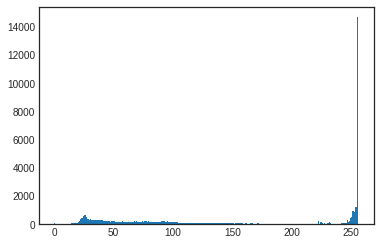

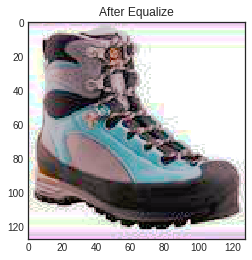

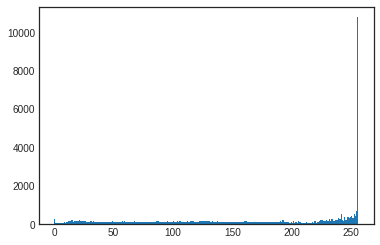

Step 2b equalized and saved to: /home/team12/team12/data/gear_images/boots/newstep2b/10211759x1104651_zm.jpeg
/home/team12/team12/data/gear_images/boots/51hAX8xT6bL._AC_US436_QL65_.jpg
Step 1 processed and saved to: /home/team12/team12/data/gear_images/boots/newstep1/51hAX8xT6bL._AC_US436_QL65_.jpg


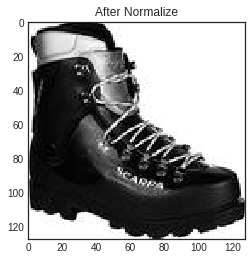

Step 2a normalized and saved to: /home/team12/team12/data/gear_images/boots/newstep2a/51hAX8xT6bL._AC_US436_QL65_.jpg


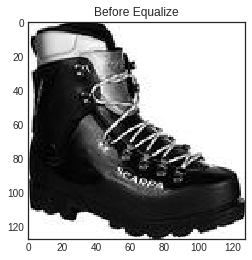

KeyboardInterrupt: 

In [6]:
import os
from os import listdir, makedirs
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from PIL import ImageOps
desired_size = 128

def process_image(old_im_pth,new_im_path):
    im = Image.open(old_im_pth)
    old_size = im.size  

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
   
    im = im.resize(new_size, Image.ANTIALIAS)
   
    new_im = Image.new("RGB", (desired_size, desired_size), (255, 225, 255))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                     (desired_size-new_size[1])//2))
    new_im.save(new_im_path, "JPEG")
    
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def save_equalize(image_path, new_image_path):
    img = Image.open(image_path).convert('RGB')
    plt.imshow(img)
    plt.title('Before Equalize')
    plt.show()
    
    #histogram
    mp_img=mpimg.imread(image_path)
    plt.style.use('seaborn-white')
    plt.hist(mp_img.ravel(), 256, [0, 256])
    plt.show()
    
    new_img = ImageOps.equalize(img)
    plt.imshow(new_img)
    plt.title('After Equalize')
    plt.show()

    #save image
    new_img.save(new_image_path, "JPEG")
    #histogram
    mp_img=mpimg.imread(new_image_path)
    plt.style.use('seaborn-white')
    plt.hist(mp_img.ravel(), 256, [0, 256])
    plt.show()
    
    
    
def save_normalize2(image_path, new_image_path):
    import cv2 as cv
    img = cv.imread(image_path)
    normalizedImg = cv.normalize(img,  img, 0, 255, cv.NORM_MINMAX)
    cv.imwrite(new_image_path,normalizedImg)
    plt.imshow(normalizedImg)
    plt.title('After Normalize')
    plt.show()

def save_normalize(image_path, new_image_path):
    
    img = Image.open(image_path).convert('RGB')
    plt.imshow(img)
    plt.title('Before Normalize')
    plt.show()
    
    #histogram
    mp_img=mpimg.imread(image_path)
    plt.style.use('seaborn-white')
    plt.hist(mp_img.ravel(), 256, [0, 256])
    plt.show()
    
    arr = np.array(img)
    new_img = normalize(arr)
    new_image = Image.fromarray(new_img.astype('uint8'),'RGB')
    #new_img = Image.fromarray(normalize(arr).astype('uint8'),'RGB')
    plt.imshow(new_img)
    plt.title('After Normalize')
    plt.show()
   
    #save
    new_image.save(new_image_path, "JPEG")
    
    #histogram
    mp_img=mpimg.imread(new_image_path)
    plt.style.use('seaborn-white')
    plt.hist(mp_img.ravel(), 256, [0, 256])
    plt.show()
    
   

img_root = '/home/team12/team12/data/gear_images'
img_dirs = [os.path.join(img_root, o) for o in os.listdir(img_root) if os.path.isdir(os.path.join(img_root,o))]
for img_dir in img_dirs:
    img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))]
    for img_file in img_files:
        print(img_dir + '/' + img_file)
        image_path = img_dir + '/' + img_file
        
        #step 1 process image with pad and resize
        save_dir = img_dir + '/newstep1/'
        if not os.path.exists(save_dir):
          os.makedirs(save_dir)
        new_image_path_step1 = save_dir + img_file
        process_image(image_path, new_image_path_step1)
        print('Step 1 processed and saved to: ' + new_image_path_step1)
        
        #step 2a is normalize
        save_dir = img_dir + '/newstep2a/'
        if not os.path.exists(save_dir):
          os.makedirs(save_dir)
        new_image_path_step2a = save_dir + img_file
        save_normalize2(new_image_path_step1, new_image_path_step2a)
        print('Step 2a normalized and saved to: ' + new_image_path_step2a)
        
        
        #step 2b is equalize
        save_dir = img_dir + '/newstep2b/'
        if not os.path.exists(save_dir):
          os.makedirs(save_dir)
        new_image_path_step2b = save_dir + img_file
        save_equalize(new_image_path_step1, new_image_path_step2b)
        print('Step 2b equalized and saved to: ' + new_image_path_step2b)